# Assignment 1: Examining Trends in US Baby Names 1880 - 2016
### Lucy Byrne - 15363761

This notebook uses Baby Names from Social Security Card Applications data to analyse the following:

- What were the most popular baby names for each year?
- How does the share of most popular names change over the years?
- How long did the most popular names stay at #1?
- What were the most popular names of each decade?
- How long do names stay in the top rankings?

## 1. Data identification and collection

I chose the dataset of US Baby Names 1880 - 2016, which consisted of 137 text files. Each text file represented a year. The data was in the form "name, gender, incidences of name". To store and sort the data I combined the top 20 female and the top 20 male names from each year into one csv.

## 2. Data preparation

To create one csv file, I first created a list of all the text file names.

In [98]:
textFiles = []

for i in range(1880, 2017):
    year = str(i)
    name = "yob"+year+".txt"
    textFiles.append(name)

Next, I made a file called names.csv to store all of the top 20 names from each year, and wrote the header.

I iterated through the list of text file names to open each one by one.

Firstly, the first 20 lines (representing the female names) were stripped. The year was added to the end of each line in the form ",year". This was found by taking a substring of the text file name. The result was then appended to the csv file. 

To get the male names, I iterated through the file until ",M," was found. The index of this row was recorded then I repeated the same steps as above, except instead of getting the first 20 lines, the first 20 lines from the index were taken and appended to the csv file. 

The result is a csv file in the form:

Top 20 girls names, 1880

Top 20 boys names, 1880

Top 20 girls names, 1881

Top 20 boys names, 1881

...

Top 20 girls names, 2016

Top 20 boys names, 2016


In [100]:
   
filein = open("names.csv","a")
filein.truncate()
filein.write("name,gender,count,year\n") #heading

for i in textFiles:
    fin = open(i,"r")
    lines = fin.readlines()
    
    #girls names
    for line in lines[0:20]:
        line = line.strip()
        line = line + "," + i[-8:-4] #add ",year" to the end of each line
        filein.write(line+"\n")
    
    #find where the male names start for each year
    counter = 0
    start = 0
    for line in lines:
        counter = counter + 1
        if ",M," in line:
            start = counter
            break
    
    #boys names
    for l in lines[start:start+20]:
        l = l.strip()
        l = l + "," + i[-8:-4] #add ",year" to the end of each line
        filein.write(l+"\n") 
   
    fin.close()

filein.close()
        

My reasoning for only taking the top names and ignoring the rest of the names was because top bottom names were often "unique" and one-off names that rarely occured and trends could not be spotted. All of the bottom names occured only 5 times that year and rarely climbed to a signifigant spot. 

# 3. Analysis and interpretation

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

names = pd.read_csv("names.csv")

### Most Popular Girls Name by Year

In [96]:
topGirls = names.iloc[::40, :]
topGirls.set_index('year')

,name,gender,count
year,,,
1880,Mary,F,7065
1881,Mary,F,6919
1882,Mary,F,8148
1883,Mary,F,8012
1884,Mary,F,9217
1885,Mary,F,9128
1886,Mary,F,9889
1887,Mary,F,9888
1888,Mary,F,11754


### Most Popular Boys Names by Year

In [64]:
topB = names[names.index % 40 != 0] #excludes girls
topBoys = topB[topB.index % 20 == 0] #includes boys
topBoys.set_index('year')

,name,gender,count
year,,,
1880,William,M,9532
1881,William,M,8524
1882,William,M,9298
1883,William,M,8387
1884,William,M,8897
1885,William,M,8044
1886,William,M,8252
1887,William,M,7470
1888,William,M,8705


### Share of most popular names

We can see from the graphs below that in 1880, one or a few names made up the large majority, while there were relatively few occurences of other names.

In 2016, the most popular names are shared more evenly, with the names having similar occurences and levels of popularity.

Text(0.5,1,'Share of Top 20 Boys Names 2016')

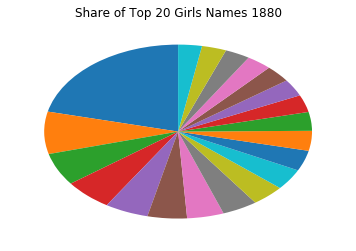

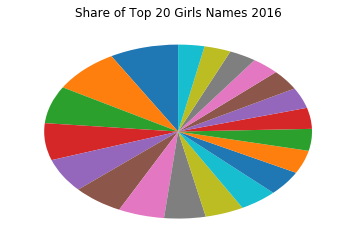

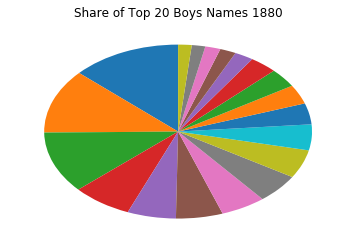

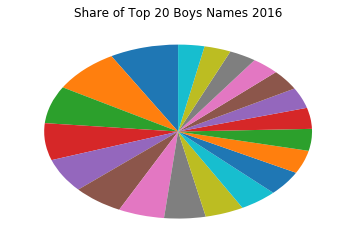

In [249]:
girls1880 = names.iloc[0:20]
g = girls1880[['name','count']]
graph = g.plot(kind='pie',y = 'count', startangle=90, legend=False, labels=None)
graph.set_ylabel("")
graph.set_title("Share of Top 20 Girls Names 1880")

girls2016 = names.iloc[5440:5460]
g2 = girls2016[['name','count']]
graph = g2.plot(kind='pie',y = 'count', startangle=90, legend=False, labels=None)
graph.set_ylabel("")
graph.set_title("Share of Top 20 Girls Names 2016")

boys1880 = names.iloc[21:40]
g3 = boys1880[['name','count']]
graph = g3.plot(kind='pie',y = 'count', startangle=90, legend=False, labels=None)
graph.set_ylabel("")
graph.set_title("Share of Top 20 Boys Names 1880")

boys2016 = names.iloc[5461:5480]
g4 = girls2016[['name','count']]
graph = g4.plot(kind='pie',y = 'count', startangle=90, legend=False, labels=None)
graph.set_ylabel("")
graph.set_title("Share of Top 20 Boys Names 2016")

### How Long Did Names Stay on Top?

The graphs below show how many years particular names stayed at #1 in the rankings. For boys, William was the post popular for 40 years. For girls, it was Mary with over 70 years.

Text(0.5,1,'#1 Male Names; Years on Top')

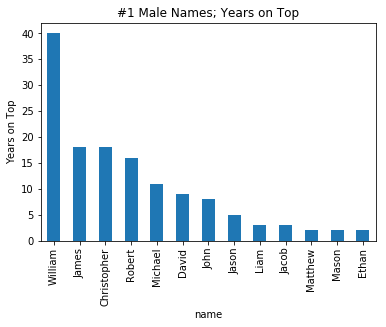

In [253]:
groups = topBoys.groupby("name")
top = groups['count'].count()
top.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = top.plot(kind='bar')
graph.set_ylabel("Years on Top")
graph.set_title("#1 Male Names; Years on Top")

Text(0.5,1,'#1 Female Names; Years on Top')

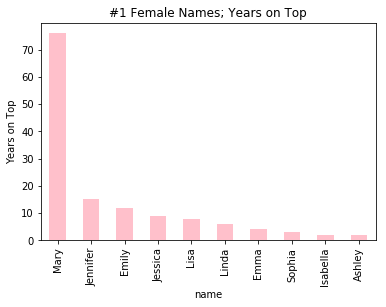

In [254]:
groups = topGirls.groupby("name")
top = groups['count'].count()
top.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = top.plot(kind='bar', color="pink")
graph.set_ylabel("Years on Top")
graph.set_title("#1 Female Names; Years on Top")

### Most Popular Names by Decade

This was calculated by counting overall occurrences over the decade, rather than how long it spent at the top of the rankings.

1960s: "Lisa" stood out as a name unique to the 60s along with "Mark" for males.

1970s: "Jennifer" shoots to the top akong with "Christopher"

1980s: "Jessica" appears for the first time along with "Joshua"

1990s: The names stay traditonal, with "Ashley" appearing for girls and "Tyler" for boys.

2000s: "Michael" appears as the most popular while "Emily" arrives to the top for girls also.

This series of graphs illustrates the earlier point where the share of popular names seems to even out. We can see decade by decade how the gap between the leading names and the others closes as time moves on, creating less of a long tail. 

Text(0.5,1,'Most Popular Names of the 60s')

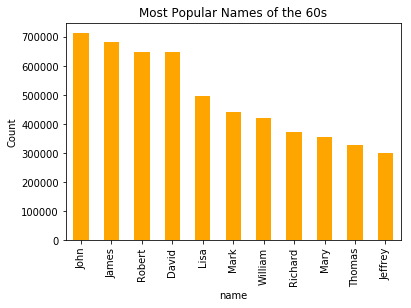

In [201]:
sixties = names[3200:3600]
groups = sixties.groupby('name')
pop60 = groups['count'].sum()
pop60.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = pop60[pop60 > 300000].plot(kind='bar', color="orange")
graph.set_ylabel("Count")
graph.set_title("Most Popular Names of the 60s")

Text(0.5,1,'Most Popular Names of the 70s')

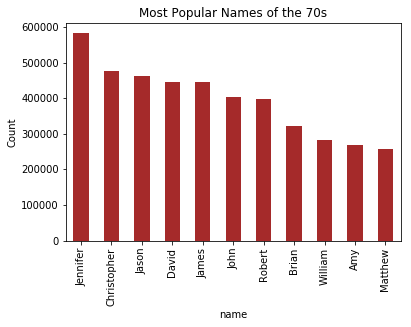

In [209]:
seventies = names[3600:4000]
groups = seventies.groupby('name')
pop70 = groups['count'].sum()
pop70.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = pop70[pop70 > 255000].plot(kind='bar', color="brown")
graph.set_ylabel("Count")
graph.set_title("Most Popular Names of the 70s")

Text(0.5,1,'Most Popular Names of the 80s')

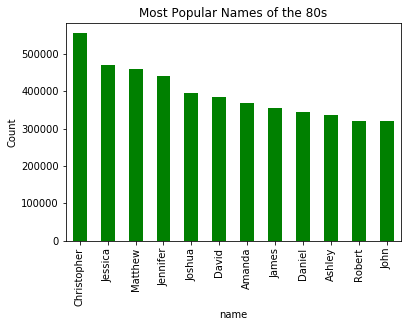

In [213]:
eighties = names[4000:4400]
groups = eighties.groupby('name')
pop80 = groups['count'].sum()
pop80.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = pop80[pop80 > 300000].plot(kind='bar', color="green")
graph.set_ylabel("Count")
graph.set_title("Most Popular Names of the 80s")

Text(0.5,1,'Most Popular Names of the 90s')

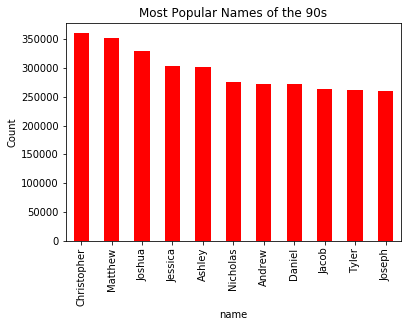

In [219]:
nineties = names[4400:4800]
groups = nineties.groupby('name')
pop90 = groups['count'].sum()
pop90.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = pop90[pop90 > 260000].plot(kind='bar', color="red")
graph.set_ylabel("Count")
graph.set_title("Most Popular Names of the 90s")

Text(0.5,1,'Most Popular Names of the 00s')

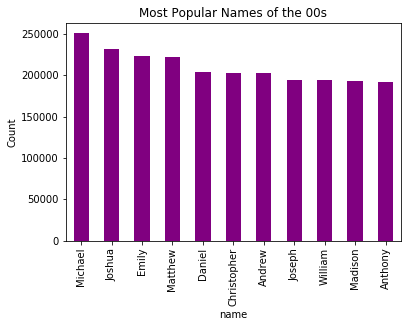

In [226]:
noughties = names[4800:5200]
groups = noughties.groupby('name')
pop00 = groups['count'].sum()
pop00.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
graph = pop00[pop00 > 190000].plot(kind='bar', color="purple")
graph.set_ylabel("Count")
graph.set_title("Most Popular Names of the 00s")

### How Long Do Names Stay in the Top 20?

The scatter plot below shows a general overview of the lifespan of all names that appear in the top 20.

The blue dots represent an individual name and the position along the x axis represents how many years it stayed in the 20.
The red dot shows the mean length of time a name stays in the top 20, which is 28 years.

Text(0.5,0,'Years')

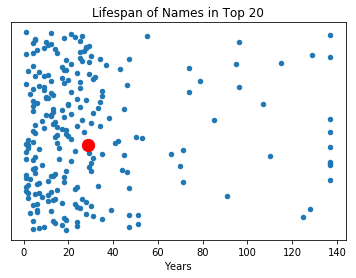

In [94]:
groups = names.groupby('name')

length = (groups['year'].max() - groups['year'].min()) + 1 # latest year in top 20 - first appearance in top 20. +1 because if name appears and disappears in same year it should be 1, not 0
plt.scatter(length, length.index, 20)
plt.scatter(length.mean(), 100, 150, c="red")
plt.yticks([])
plt.title("Lifespan of Names in Top 20")
plt.xlabel("Years")

### Further Analysis

How this data could be further analyzed:

- Look at pop culture trends and see do they influence the most popular names.
- See what decades particular names fell off the list.
- Trace the downfall of once popular names like "Mary" and "John".
- Examine the bottom names on the list to see trends in the "unique" names category.